<a href="https://colab.research.google.com/github/Akashkunwar/Brushing_habits/blob/main/Brushing_Habit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install sweetviz --q

In [ ]:
# !pip install pandas-profiling==3.4.0

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="darkgrid")

from pandas_profiling import ProfileReport
import sweetviz as sv

import warnings
warnings.filterwarnings("ignore")

In [168]:
df = pd.read_csv('https://raw.githubusercontent.com/Akashkunwar/Brushing_habits/main/Brushing%20Habit%20Data.csv')

In [169]:
df.head()

S No  \
0     1   
1     2   
2     3   
3     4   
4     5   

  17. Does this family Member takes the decision to buy toothpaste in the household?   \
0                                                 No                                    
1                                                 No                                    
2                                                 No                                    
3                                                Yes                                    
4                                                Yes                                    

  18. Does this family member go and shop for toothpaste in the household?   \
0                                                 No                          
1                                                 No                          
2                                                 No                          
3                                                Yes                          
4                                                Yes                          

  19. Does this family member take the decision to buy toothbrush in the household?   \
0                                                 No                                   
1                                                 No                                   
2                                                 No                                   
3                                                Yes                                   
4                                                Yes                                   

  20. Does this family member go and shop for toothbrush in the household?   \
0                                                 No                          
1                                                 No                          
2                                                 No                          
3                                                Yes                          
4                                                Yes                          

   21. Total Family Members in the House Other Than You   \
0                                                  3       
1                                                  3       
2                                                  3       
3                                                  3       
4                                                  3       

   22b. Age of Family Member  22d. How often do you clean your mouth?   \
0                          50                                   Daily    
1                          48                                   Daily    
2                          26                                   Daily    
3                          25                                   Daily    
4                           5                                   Daily    

  22e. What did this member do today in the morning for cleaning mouth?   \
0                            Toothpaste ,Toothbrush                        
1                            Toothpaste ,Toothbrush                        
2                            Toothpaste ,Toothbrush                        
3                                            Daatun                        
4                            Toothpaste ,Toothbrush                        

  22f. What did this member do yesterday in the morning for cleaning mouth?   \
0                                            Daatun                            
1                            Toothpaste ,Toothbrush                            
2                            Toothpaste ,Toothbrush                            
3                            Toothpaste ,Toothbrush                            
4                            Toothpaste ,Toothbrush                            

  22g. What did this member do before 2 days in the morning for cleaning mouth?   \
0                                             Kulla                                
1         

In [170]:
df.columns

Index(['S No',
       '17. Does this family Member takes the decision to buy toothpaste in the household? ',
       '18. Does this family member go and shop for toothpaste in the household? ',
       '19. Does this family member take the decision to buy toothbrush in the household? ',
       '20. Does this family member go and shop for toothbrush in the household? ',
       '21. Total Family Members in the House Other Than You ',
       '22b. Age of Family Member ',
       '22d. How often do you clean your mouth? ',
       '22e. What did this member do today in the morning for cleaning mouth? ',
       '22f. What did this member do yesterday in the morning for cleaning mouth? ',
       '22g. What did this member do before 2 days in the morning for cleaning mouth? ',
       '22h. What did this member do before 3 days in the morning for cleaning mouth? ',
       '22i. What did this member do before 4 days in the morning for cleaning mouth? ',
       '22j. What did this member do before 5

In [171]:
df.columns = df.columns.str.rstrip()

In [172]:
df.columns

Index(['S No',
       '17. Does this family Member takes the decision to buy toothpaste in the household?',
       '18. Does this family member go and shop for toothpaste in the household?',
       '19. Does this family member take the decision to buy toothbrush in the household?',
       '20. Does this family member go and shop for toothbrush in the household?',
       '21. Total Family Members in the House Other Than You',
       '22b. Age of Family Member', '22d. How often do you clean your mouth?',
       '22e. What did this member do today in the morning for cleaning mouth?',
       '22f. What did this member do yesterday in the morning for cleaning mouth?',
       '22g. What did this member do before 2 days in the morning for cleaning mouth?',
       '22h. What did this member do before 3 days in the morning for cleaning mouth?',
       '22i. What did this member do before 4 days in the morning for cleaning mouth?',
       '22j. What did this member do before 5 days in the mornin

In [173]:
for x in list(df.columns[1:]):
  print(df[x].value_counts())
  print("___________________________________________________________________________________________________________")

Yes    370
No     130
Name: 17. Does this family Member takes the decision to buy toothpaste in the household?, dtype: int64
___________________________________________________________________________________________________________
Yes    346
No     154
Name: 18. Does this family member go and shop for toothpaste in the household?, dtype: int64
___________________________________________________________________________________________________________
Yes    370
No     130
Name: 19. Does this family member take the decision to buy toothbrush in the household?, dtype: int64
___________________________________________________________________________________________________________
Yes    341
No     159
Name: 20. Does this family member go and shop for toothbrush in the household?, dtype: int64
___________________________________________________________________________________________________________
3     183
4     165
5      98
6      18
8      16
11     11
7       7
2       2
Name: 21.

In [176]:
df.rename(columns={'17. Does this family Member takes the decision to buy toothpaste in the household?': 'decide_to_buy_toothpaste',
                   '18. Does this family member go and shop for toothpaste in the household?': 'buy_toothpaste',
                   '19. Does this family member take the decision to buy toothbrush in the household?': 'decide_to_buy_toothbrush',
                   '20. Does this family member go and shop for toothbrush in the household?': 'buy_toothbrush',
                   '21. Total Family Members in the House Other Than You': 'other_famaly_member',
                   '22b. Age of Family Member': 'family_member_age',
                   '22d. How often do you clean your mouth?': 'mouth_cleaning_frequency',
                   '22e. What did this member do today in the morning for cleaning mouth?': 'today',
                   '22f. What did this member do yesterday in the morning for cleaning mouth?': 'yesterday',
                   '22g. What did this member do before 2 days in the morning for cleaning mouth?': 'two_day_back',
                   '22h. What did this member do before 3 days in the morning for cleaning mouth?': 'three_day_back',
                   '22i. What did this member do before 4 days in the morning for cleaning mouth?': 'four_day_back',
                   '22j. What did this member do before 5 days in the morning for cleaning mouth?': 'five_day_back',
                   '22k. What did this member do before 6 days in the morning for cleaning mouth?': 'six_day_back'},
          inplace=True, errors='raise')

In [177]:
# percentage of people who decide to buy toothpaste
df.decide_to_buy_toothpaste.value_counts(normalize=True)*100

Yes    74.0
No     26.0
Name: decide_to_buy_toothpaste, dtype: float64

In [178]:
# percentage of people who decide to buy toothpaste actually go and buy toothpaste
df[df.decide_to_buy_toothpaste == 'yes'].buy_toothpaste.value_counts(normalize=True)*100

Series([], Name: buy_toothpaste, dtype: float64)

In [179]:
# percentage of people who don't decide to buy toothpaste actually go and buy toothpaste
df[df.decide_to_buy_toothpaste == 'no'].buy_toothpaste.value_counts(normalize=True)*100

Series([], Name: buy_toothpaste, dtype: float64)

In [180]:
# percentage of people who decide to buy toothbrush
df.decide_to_buy_toothbrush.value_counts(normalize=True)*100

Yes    74.0
No     26.0
Name: decide_to_buy_toothbrush, dtype: float64

In [181]:
# percentage of people who decide to buy toothbrush actually go and buy toothbrush
df[df.decide_to_buy_toothbrush == 'no'].buy_toothbrush.value_counts(normalize=True)*100

Series([], Name: buy_toothbrush, dtype: float64)

In [182]:
# percentage of people who don't decide to buy toothbrush actually go and buy toothbrush
df[df.decide_to_buy_toothbrush == 'yes'].buy_toothbrush.value_counts(normalize=True)*100

Series([], Name: buy_toothbrush, dtype: float64)

In [183]:
# Number of people who don't clean their mouth
df.mouth_cleaning_frequency.value_counts()

Daily     481
Never      19
Name: mouth_cleaning_frequency, dtype: int64

In [184]:
# percentage of people who don't clean their mouth
df.mouth_cleaning_frequency.value_counts(normalize=True)*100

Daily     96.2
Never      3.8
Name: mouth_cleaning_frequency, dtype: float64

In [185]:
import plotly.express as px

In [ ]:
fig = px.histogram(df, x="family_member_age", nbins=16)
fig.show()

In [ ]:
fig = px.histogram(df[df.decide_to_buy_toothbrush=='yes'], x="family_member_age", nbins=16)
fig.show()

In [ ]:
fig = px.histogram(df[df.decide_to_buy_toothbrush=='no'], x="family_member_age", nbins=16)
fig.show()

In [150]:
df

S No decide_to_buy_toothpaste buy_toothpaste decide_to_buy_toothbrush  \
0       1                       no             no                       no   
1       2                       no             no                       no   
2       3                       no             no                       no   
3       4                      yes            yes                      yes   
4       5                      yes            yes                      yes   
..    ...                      ...            ...                      ...   
495   496                       no             no                       no   
496   497                      yes            yes                      yes   
497   498                       no             no                       no   
498   499                       no             no                       no   
499   500                       no             no                       no   

    buy_toothbrush  famaly_member  family_member_age mouth_cleaning_frequency  \
0               no              4                 50                    daily   
1               no              4                 48                    daily   
2               no              4                 26                    daily   
3              yes              4                 25                    daily   
4              yes              4                  5                    daily   
..             ...            ...                ...                      ...   
495             no              4                 22                    daily   
496            yes              4                 42                    daily   
497             no              4                 20                    daily   
498             no              5                 59                    daily   
499             no              5                 38                    daily   

                       today                yesterday  \
0    toothbrush & toothpaste                   daatun   
1    toothbrush & toothpaste  toothbrush & toothpaste   
2    toothbrush & toothpaste  toothbrush & toothpaste   
3                     daatun  toothbrush & toothpaste   
4    toothbrush & toothpaste  toothbrush & toothpaste   
..                       ...                      ...   
495  toothbrush & toothpaste                   daatun   
496  toothbrush & toothpaste                   daatun   
497                   daatun  toothbrush & toothpaste   
498                   daatun  toothbrush & toothpaste   
499  toothbrush & toothpaste  toothbrush & toothpaste   

                two_day_back           three_day_back  \
0                      kulla  toothbrush & toothpaste   
1                     daatun                    kulla   
2    toothbrush & toothpaste  toothbrush & toothpaste   
3                     daatun  toothbrush & toothpaste   
4    toothbrush & toothpaste  toothbrush & toothpaste   
..                       ...                      ...   
495  toothbrush & toothpaste  toothbrush & toothpaste   
496  toothbrush & toothpaste  toothbrush & toothpaste   
497                      ash                   daatun   
498                   daatun  toothbrush & toothpaste   
499  toothbrush & toothpaste  toothbrush & toothpaste   

               four_day_back            five_day_back  \
0                     daatun                    kulla   
1    toothbrush & toothpaste                   daatun   
2    toothbrush & toothpaste  toothbrush & toothpaste   
3                     daatun                   daatun   
4    toothbrush & toothpaste  toothbrush & toothpaste   
..                       ...                      ...   
495  toothbrush & toothpaste                   daatun   
496  toothbrush & toothpaste  toothbrush & toothpaste   
497                   daatun                      ash   
498                   daatun  toothbrush & toothpaste   
499  toothbrush & toothpaste  toothbrush & toothpaste   

                six_day_back  toothbrush

In [167]:
50/500*100

10.0

In [160]:
df['toothbrush & toothpaste'].value_counts()

7    167
3     76
4     65
2     53
0     50
1     39
5     38
6     12
Name: toothbrush & toothpaste, dtype: int64

In [161]:
df['kulla'].value_counts()

0    404
1     26
2     17
4     17
3     17
7      8
5      7
6      4
Name: kulla, dtype: int64

In [162]:
df['nothing'].value_counts()

0    470
7     19
2      4
1      4
4      3
Name: nothing, dtype: int64

In [163]:
df['ash'].value_counts()

0    482
1      8
2      7
3      2
4      1
Name: ash, dtype: int64

In [164]:
df['daatun'].value_counts()

0    228
3     87
2     63
4     45
5     34
6     19
1     15
7      9
Name: daatun, dtype: int64

In [165]:
df['dont know'].value_counts()

0    483
1     12
2      4
4      1
Name: dont know, dtype: int64

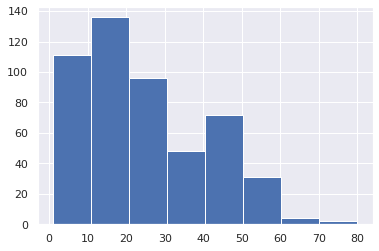

In [ ]:
df.family_member_age.hist(bins = 8)

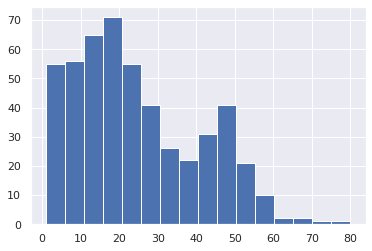

In [ ]:
df.family_member_age.hist(bins = 16)

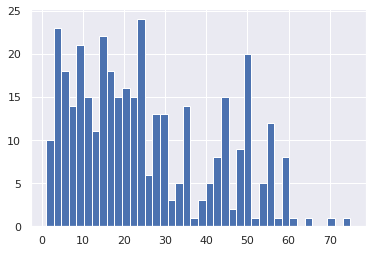

In [ ]:
df[df.decide_to_buy_toothbrush == 'yes'].family_member_age.hist(bins = 16)

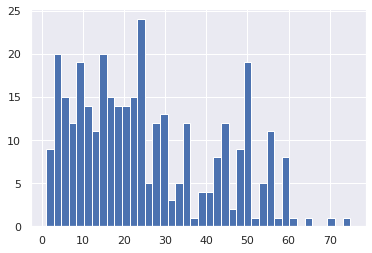

In [ ]:
df[df.buy_toothbrush == 'yes'].family_member_age.hist(bins = 16)

In [ ]:
df.rename(columns={'17. Does this family Member takes the decision to buy toothpaste in the household?': 'decide_to_buy_toothpaste',
                   '18. Does this family member go and shop for toothpaste in the household?': 'buy_toothpaste',
                   '19. Does this family member take the decision to buy toothbrush in the household?': 'decide_to_buy_toothbrush',
                   '20. Does this family member go and shop for toothbrush in the household?': 'buy_toothbrush',
                   '21. Total Family Members in the House Other Than You': 'other_famaly_member',
                   '22b. Age of Family Member': 'family_member_age',
                   '22d. How often do you clean your mouth?': 'mouth_cleaning_frequency',
                   '22e. What did this member do today in the morning for cleaning mouth?': 'today',
                   '22f. What did this member do yesterday in the morning for cleaning mouth?': 'yesterday',
                   '22g. What did this member do before 2 days in the morning for cleaning mouth?': 'two_day_back',
                   '22h. What did this member do before 3 days in the morning for cleaning mouth?': 'three_day_back',
                   '22i. What did this member do before 4 days in the morning for cleaning mouth?': 'four_day_back',
                   '22j. What did this member do before 5 days in the morning for cleaning mouth?': 'five_day_back',
                   '22k. What did this member do before 6 days in the morning for cleaning mouth?': 'six_day_back'},
          inplace=True, errors='raise')

In [ ]:
clm = ['decide_to_buy_toothpaste', 'buy_toothpaste',
       'decide_to_buy_toothbrush', 'buy_toothbrush',
       'mouth_cleaning_frequency', 'today', 'yesterday',
       'two_day_back', 'three_day_back', 'four_day_back',
       'five_day_back', 'six_day_back']
for x in clm:
  df[x] = df[x].str.lower().str.strip()

In [ ]:
for x in clm:
  print(df[x].unique())
  print("_________________________________________________________________")

['no' 'yes']
_________________________________________________________________
['no' 'yes']
_________________________________________________________________
['no' 'yes']
_________________________________________________________________
['no' 'yes']
_________________________________________________________________
['daily' 'never']
_________________________________________________________________
['toothpaste ,toothbrush' 'daatun' 'nothing' 'kulla' 'ash'
 'toothbrush ,toothpaste']
_________________________________________________________________
['daatun' 'toothpaste ,toothbrush' 'nothing' 'kulla' 'ash'
 'toothbrush ,toothpaste']
_________________________________________________________________
['kulla' 'daatun' 'toothpaste ,toothbrush' 'nothing' 'ash'
 'toothbrush ,toothpaste']
_________________________________________________________________
['toothpaste ,toothbrush' 'kulla' 'nothing' 'daatun' 'ash' 'dont know'
 'toothbrush ,toothpaste']
______________________________________________

In [ ]:
for x in clm[5:]:
  df[x] = df[x].replace(['toothpaste ,toothbrush',
                         'toothbrush ,toothpaste'],'toothbrush & toothpaste')

In [ ]:
def count(df):
    df['toothbrush & toothpaste'] = np.sum(df == 'toothbrush & toothpaste')
    df['kulla'] = np.sum(df == 'kulla')
    df['nothing'] = np.sum(df == 'nothing')
    df['daatun'] = np.sum(df == 'daatun')
    df['ash'] = np.sum(df == 'ash')
    df['dont know'] = np.sum(df == 'dont know')
    return df

df = df.apply(count, axis = 1)

In [ ]:
df.other_famaly_member = df.other_famaly_member + 1

df.rename(columns={'other_famaly_member': 'famaly_member'},
          inplace=True, errors='raise')

In [ ]:
df

S No decide_to_buy_toothpaste buy_toothpaste decide_to_buy_toothbrush  \
0       1                       no             no                       no   
1       2                       no             no                       no   
2       3                       no             no                       no   
3       4                      yes            yes                      yes   
4       5                      yes            yes                      yes   
..    ...                      ...            ...                      ...   
495   496                       no             no                       no   
496   497                      yes            yes                      yes   
497   498                       no             no                       no   
498   499                       no             no                       no   
499   500                       no             no                       no   

    buy_toothbrush  famaly_member  family_member_age mouth_cleaning_frequency  \
0               no              4                 50                    daily   
1               no              4                 48                    daily   
2               no              4                 26                    daily   
3              yes              4                 25                    daily   
4              yes              4                  5                    daily   
..             ...            ...                ...                      ...   
495             no              4                 22                    daily   
496            yes              4                 42                    daily   
497             no              4                 20                    daily   
498             no              5                 59                    daily   
499             no              5                 38                    daily   

                       today                yesterday  \
0    toothbrush & toothpaste                   daatun   
1    toothbrush & toothpaste  toothbrush & toothpaste   
2    toothbrush & toothpaste  toothbrush & toothpaste   
3                     daatun  toothbrush & toothpaste   
4    toothbrush & toothpaste  toothbrush & toothpaste   
..                       ...                      ...   
495  toothbrush & toothpaste                   daatun   
496  toothbrush & toothpaste                   daatun   
497                   daatun  toothbrush & toothpaste   
498                   daatun  toothbrush & toothpaste   
499  toothbrush & toothpaste  toothbrush & toothpaste   

                two_day_back           three_day_back  \
0                      kulla  toothbrush & toothpaste   
1                     daatun                    kulla   
2    toothbrush & toothpaste  toothbrush & toothpaste   
3                     daatun  toothbrush & toothpaste   
4    toothbrush & toothpaste  toothbrush & toothpaste   
..                       ...                      ...   
495  toothbrush & toothpaste  toothbrush & toothpaste   
496  toothbrush & toothpaste  toothbrush & toothpaste   
497                      ash                   daatun   
498                   daatun  toothbrush & toothpaste   
499  toothbrush & toothpaste  toothbrush & toothpaste   

               four_day_back            five_day_back  \
0                     daatun                    kulla   
1    toothbrush & toothpaste                   daatun   
2    toothbrush & toothpaste  toothbrush & toothpaste   
3                     daatun                   daatun   
4    toothbrush & toothpaste  toothbrush & toothpaste   
..                       ...                      ...   
495  toothbrush & toothpaste                   daatun   
496  toothbrush & toothpaste  toothbrush & toothpaste   
497                   daatun                      ash   
498                   daatun  toothbrush & toothpaste   
499  toothbrush & toothpaste  toothbrush & toothpaste   

                six_day_back  toothbrush

In [ ]:
plt.figure(figsize=(20,8))
sns.distplot(df['toothbrush & toothpaste'])
plt.plot()

In [ ]:
df.columns

Index(['S No', 'decide_to_buy_toothpaste', 'buy_toothpaste',
       'decide_to_buy_toothbrush', 'buy_toothbrush', 'famaly_member',
       'family_member_age', 'mouth_cleaning_frequency', 'today', 'yesterday',
       'two_day_back', 'three_day_back', 'four_day_back', 'five_day_back',
       'six_day_back', 'toothbrush & toothpaste', 'kulla', 'nothing', 'daatun',
       'ash', 'dont know'],
      dtype='object')

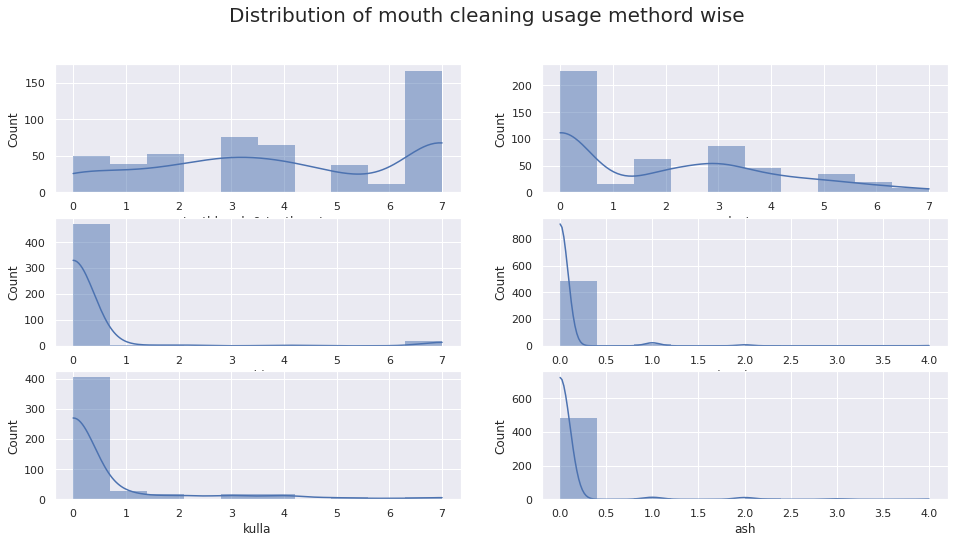

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(3,2,1)
sns.histplot(df['toothbrush & toothpaste'], edgecolor='', linewidth=0,kde=True)

plt.subplot(3,2,2)
sns.histplot(df['daatun'], edgecolor='', linewidth=0,kde=True)

plt.subplot(3,2,3)
sns.histplot(df['nothing'], edgecolor='', linewidth=0,kde=True)

plt.subplot(3,2,4)
sns.histplot(df['dont know'], edgecolor='', linewidth=0,kde=True)

plt.subplot(3,2,5)
sns.histplot(df['kulla'], edgecolor='', linewidth=0,kde=True)

plt.subplot(3,2,6)
sns.histplot(df['ash'], edgecolor='', linewidth=0,kde=True)

plt.suptitle("Distribution of mouth cleaning usage methord wise", fontsize=20)
plt.show()

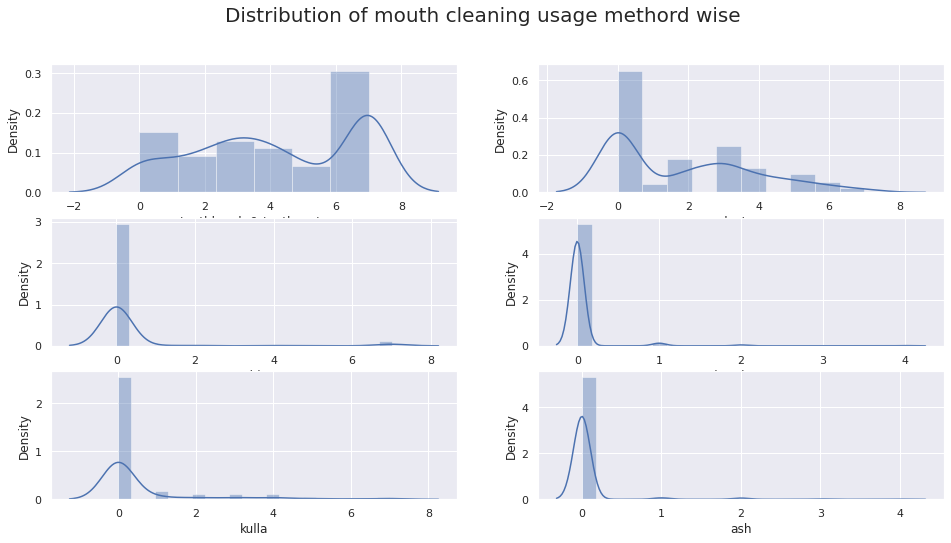

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(3,2,1)
sns.distplot(df['toothbrush & toothpaste'])

plt.subplot(3,2,2)
sns.distplot(df['daatun'])

plt.subplot(3,2,3)
sns.distplot(df['nothing'])

plt.subplot(3,2,4)
sns.distplot(df['dont know'])

plt.subplot(3,2,5)
sns.distplot(df['kulla'])

plt.subplot(3,2,6)
sns.distplot(df['ash'])

plt.suptitle("Distribution of mouth cleaning usage methord wise", fontsize=20)
plt.show()

[]

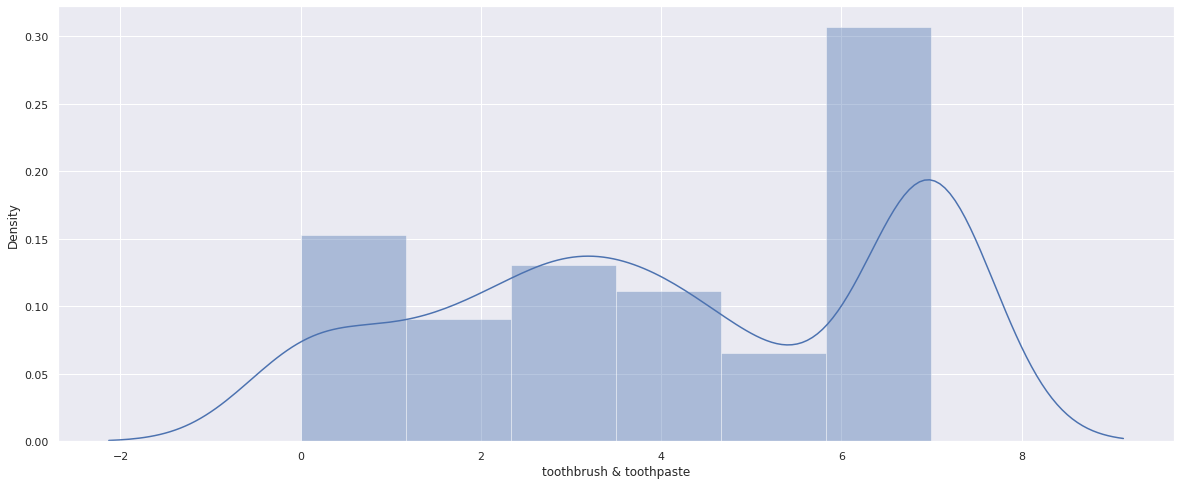

In [ ]:
plt.figure(figsize=(20,8))
sns.distplot(df['toothbrush & toothpaste'])
plt.plot()

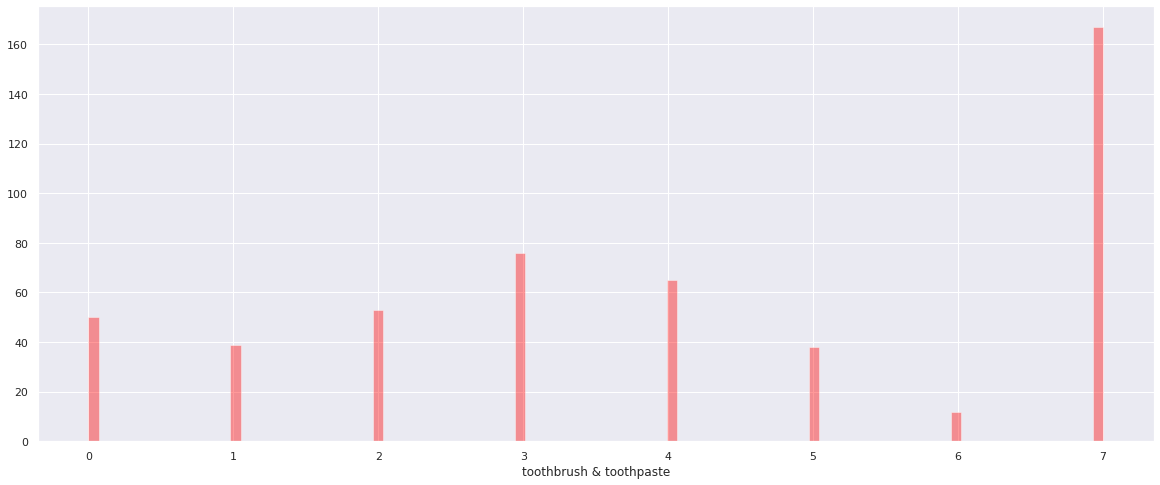

In [ ]:
plt.figure(figsize=(20,8))
sns.distplot(df['toothbrush & toothpaste'], kde=False, color='red', bins=100)
plt.show()

In [ ]:
df[df['toothbrush & toothpaste']==7]

S No decide_to_buy_toothpaste buy_toothpaste decide_to_buy_toothbrush  \
2       3                       no             no                       no   
4       5                      yes            yes                      yes   
12     13                      yes            yes                      yes   
13     14                      yes            yes                      yes   
18     19                      yes            yes                      yes   
..    ...                      ...            ...                      ...   
482   483                      yes            yes                      yes   
492   493                      yes            yes                      yes   
493   494                      yes            yes                      yes   
494   495                      yes            yes                      yes   
499   500                       no             no                       no   

    buy_toothbrush  famaly_member  family_member_age mouth_cleaning_frequency  \
2               no              4                 26                    daily   
4              yes              4                  5                    daily   
12             yes              5                 20                    daily   
13             yes              5                 20                    daily   
18             yes              7                 15                    daily   
..             ...            ...                ...                      ...   
482            yes              4                  6                    daily   
492            yes              4                 40                    daily   
493            yes              4                 25                    daily   
494            yes              4                 22                    daily   
499             no              5                 38                    daily   

                       today                yesterday  \
2    toothbrush & toothpaste  toothbrush & toothpaste   
4    toothbrush & toothpaste  toothbrush & toothpaste   
12   toothbrush & toothpaste  toothbrush & toothpaste   
13   toothbrush & toothpaste  toothbrush & toothpaste   
18   toothbrush & toothpaste  toothbrush & toothpaste   
..                       ...                      ...   
482  toothbrush & toothpaste  toothbrush & toothpaste   
492  toothbrush & toothpaste  toothbrush & toothpaste   
493  toothbrush & toothpaste  toothbrush & toothpaste   
494  toothbrush & toothpaste  toothbrush & toothpaste   
499  toothbrush & toothpaste  toothbrush & toothpaste   

                two_day_back           three_day_back  \
2    toothbrush & toothpaste  toothbrush & toothpaste   
4    toothbrush & toothpaste  toothbrush & toothpaste   
12   toothbrush & toothpaste  toothbrush & toothpaste   
13   toothbrush & toothpaste  toothbrush & toothpaste   
18   toothbrush & toothpaste  toothbrush & toothpaste   
..                       ...                      ...   
482  toothbrush & toothpaste  toothbrush & toothpaste   
492  toothbrush & toothpaste  toothbrush & toothpaste   
493  toothbrush & toothpaste  toothbrush & toothpaste   
494  toothbrush & toothpaste  toothbrush & toothpaste   
499  toothbrush & toothpaste  toothbrush & toothpaste   

               four_day_back            five_day_back  \
2    toothbrush & toothpaste  toothbrush & toothpaste   
4    toothbrush & toothpaste  toothbrush & toothpaste   
12   toothbrush & toothpaste  toothbrush & toothpaste   
13   toothbrush & toothpaste  toothbrush & toothpaste   
18   toothbrush & toothpaste  toothbrush & toothpaste   
..                       ...                      ...   
482  toothbrush & toothpaste  toothbrush & toothpaste   
492  toothbrush & toothpaste  toothbrush & toothpaste   
493  toothbrush & toothpaste  toothbrush & toothpaste   
494  toothbrush & toothpaste  toothbrush & toothpaste   
499  toothbrush & toothpaste  toothbrush & toothpaste   

                six_day_back  toothbrush

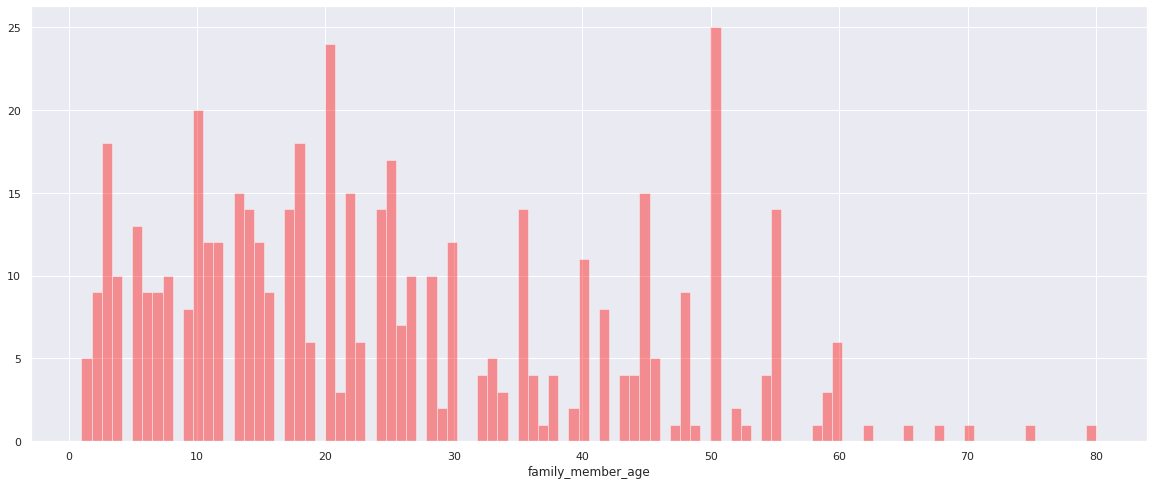

In [ ]:
plt.figure(figsize=(20,8))
sns.distplot(df.family_member_age, kde=False, color='red', bins=100)
plt.show()

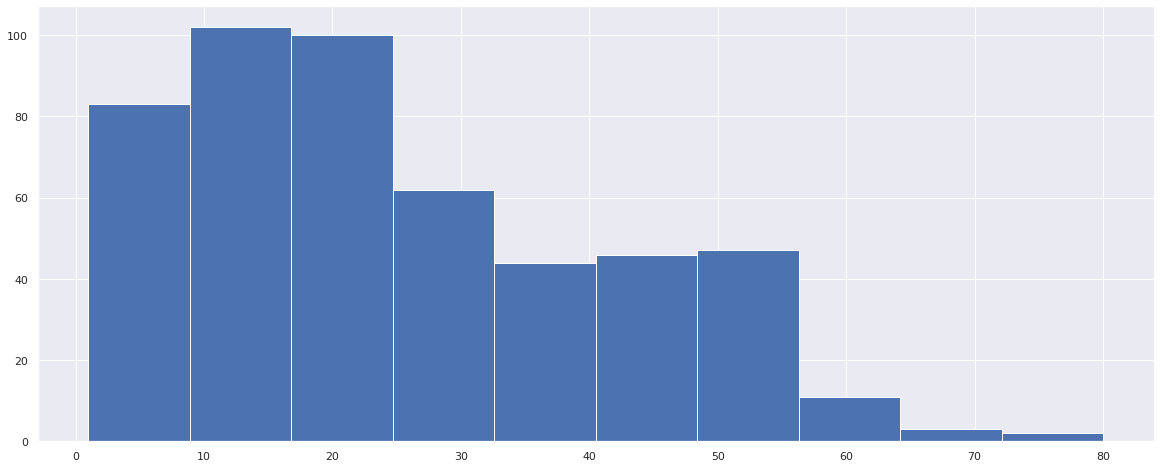

In [ ]:
plt.figure(figsize=(20,8))
plt.hist(df.family_member_age)
plt.show()

In [ ]:
df1 = df.copy()

In [ ]:
def count(df1):
    df1['toothbrush & toothpaste'] = np.sum(df1 == 'toothbrush & toothpaste')
    df1['kulla'] = np.sum(df1 == 'kulla')
    df1['nothing'] = np.sum(df1 == 'nothing')
    df1['daatun'] = np.sum(df1 == 'daatun')
    df1['ash'] = np.sum(df1 == 'ash')
    df1['dont know'] = np.sum(df1 == 'dont know')
    return df1

df1 = df1.apply(count, axis = 1)

In [ ]:
def count(df):
    df['toothbrush & toothpaste'] = np.sum(df == 'toothbrush & toothpaste')
    df['kulla'] = np.sum(df == 'kulla')
    df['nothing'] = np.sum(df == 'nothing')
    df['daatun'] = np.sum(df == 'daatun')
    df['ash'] = np.sum(df == 'ash')
    df['dont know'] = np.sum(df == 'dont know')
    return df

df.apply(count, axis = 1)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df1

S No decide_to_buy_toothpaste buy_toothpaste decide_to_buy_toothbrush  \
0       1                       no             no                       no   
1       2                       no             no                       no   
2       3                       no             no                       no   
3       4                      yes            yes                      yes   
4       5                      yes            yes                      yes   
..    ...                      ...            ...                      ...   
495   496                       no             no                       no   
496   497                      yes            yes                      yes   
497   498                       no             no                       no   
498   499                       no             no                       no   
499   500                       no             no                       no   

    buy_toothbrush  other_famaly_member  family_member_age  \
0               no                    3                 50   
1               no                    3                 48   
2               no                    3                 26   
3              yes                    3                 25   
4              yes                    3                  5   
..             ...                  ...                ...   
495             no                    3                 22   
496            yes                    3                 42   
497             no                    3                 20   
498             no                    4                 59   
499             no                    4                 38   

    mouth_cleaning_frequency                    today  \
0                      daily  toothbrush & toothpaste   
1                      daily  toothbrush & toothpaste   
2                      daily  toothbrush & toothpaste   
3                      daily                   daatun   
4                      daily  toothbrush & toothpaste   
..                       ...                      ...   
495                    daily  toothbrush & toothpaste   
496                    daily  toothbrush & toothpaste   
497                    daily                   daatun   
498                    daily                   daatun   
499                    daily  toothbrush & toothpaste   

                   yesterday             two_day_back  \
0                     daatun                    kulla   
1    toothbrush & toothpaste                   daatun   
2    toothbrush & toothpaste  toothbrush & toothpaste   
3    toothbrush & toothpaste                   daatun   
4    toothbrush & toothpaste  toothbrush & toothpaste   
..                       ...                      ...   
495                   daatun  toothbrush & toothpaste   
496                   daatun  toothbrush & toothpaste   
497  toothbrush & toothpaste                      ash   
498  toothbrush & toothpaste                   daatun   
499  toothbrush & toothpaste  toothbrush & toothpaste   

              three_day_back            four_day_back  \
0    toothbrush & toothpaste                   daatun   
1                      kulla  toothbrush & toothpaste   
2    toothbrush & toothpaste  toothbrush & toothpaste   
3    toothbrush & toothpaste                   daatun   
4    toothbrush & toothpaste  toothbrush & toothpaste   
..                       ...                      ...   
495  toothbrush & toothpaste  toothbrush & toothpaste   
496  toothbrush & toothpaste  toothbrush & toothpaste   
497                   daatun                   daatun   
498  toothbrush & toothpaste                   daatun   
499  toothbrush & toothpaste  toothbrush & toothpaste   

               five_day_back             six_day_back  \
0                      kulla  toothbrush & toothpaste   
1                     daatun                   daatun   
2    toothbrush & toothpaste  toothbrush & toothpaste   
3                     daatun            

In [ ]:
df.head(5)

S No decide_to_buy_toothpaste buy_toothpaste decide_to_buy_toothbrush  \
0     1                       no             no                       no   
1     2                       no             no                       no   
2     3                       no             no                       no   
3     4                      yes            yes                      yes   
4     5                      yes            yes                      yes   

  buy_toothbrush  other_famaly_member  family_member_age  \
0             no                    3                 50   
1             no                    3                 48   
2             no                    3                 26   
3            yes                    3                 25   
4            yes                    3                  5   

  mouth_cleaning_frequency                    today                yesterday  \
0                    daily  toothbrush & toothpaste                   daatun   
1                    daily  toothbrush & toothpaste  toothbrush & toothpaste   
2                    daily  toothbrush & toothpaste  toothbrush & toothpaste   
3                    daily                   daatun  toothbrush & toothpaste   
4                    daily  toothbrush & toothpaste  toothbrush & toothpaste   

              two_day_back           three_day_back            four_day_back  \
0                    kulla  toothbrush & toothpaste                   daatun   
1                   daatun                    kulla  toothbrush & toothpaste   
2  toothbrush & toothpaste  toothbrush & toothpaste  toothbrush & toothpaste   
3                   daatun  toothbrush & toothpaste                   daatun   
4  toothbrush & toothpaste  toothbrush & toothpaste  toothbrush & toothpaste   

             five_day_back             six_day_back  
0                    kulla  toothbrush & toothpaste  
1                   daatun                   daatun  
2  toothbrush & toothpaste  toothbrush & toothpaste  
3                   daatun                   daatun  
4  toothbrush & toothpaste  toothbrush & toothpaste

In [ ]:
df[(df['decide_to_buy_toothbrush']=='no') & (df['buy_toothbrush']=='no')]

In [ ]:
# #EDA using Autoviz
# sweet_report = sv.analyze(df)

# #Saving results to HTML file
# sweet_report.show_html('sweet_report.html')

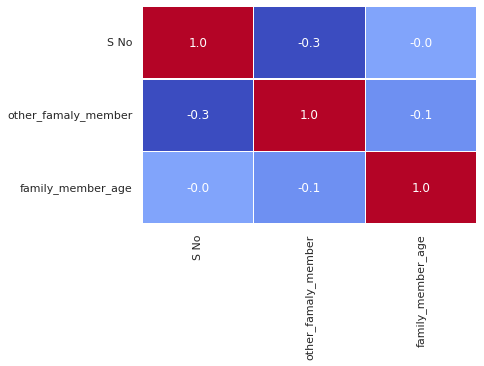

In [ ]:
# plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(df.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

In [ ]:
df.head()

S No decide_to_buy_toothpaste buy_toothpaste decide_to_buy_toothbrush  \
0     1                       no             no                       no   
1     2                       no             no                       no   
2     3                       no             no                       no   
3     4                      yes            yes                      yes   
4     5                      yes            yes                      yes   

  buy_toothbrush  other_famaly_member  family_member_age  \
0             no                    3                 50   
1             no                    3                 48   
2             no                    3                 26   
3            yes                    3                 25   
4            yes                    3                  5   

  mouth_cleaning_frequency                    today                yesterday  \
0                    daily  toothbrush & toothpaste                   daatun   
1                    daily  toothbrush & toothpaste  toothbrush & toothpaste   
2                    daily  toothbrush & toothpaste  toothbrush & toothpaste   
3                    daily                   daatun  toothbrush & toothpaste   
4                    daily  toothbrush & toothpaste  toothbrush & toothpaste   

              two_day_back           three_day_back            four_day_back  \
0                    kulla  toothbrush & toothpaste                   daatun   
1                   daatun                    kulla  toothbrush & toothpaste   
2  toothbrush & toothpaste  toothbrush & toothpaste  toothbrush & toothpaste   
3                   daatun  toothbrush & toothpaste                   daatun   
4  toothbrush & toothpaste  toothbrush & toothpaste  toothbrush & toothpaste   

             five_day_back             six_day_back  
0                    kulla  toothbrush & toothpaste  
1                   daatun                   daatun  
2  toothbrush & toothpaste  toothbrush & toothpaste  
3                   daatun                   daatun  
4  toothbrush & toothpaste  toothbrush & toothpaste

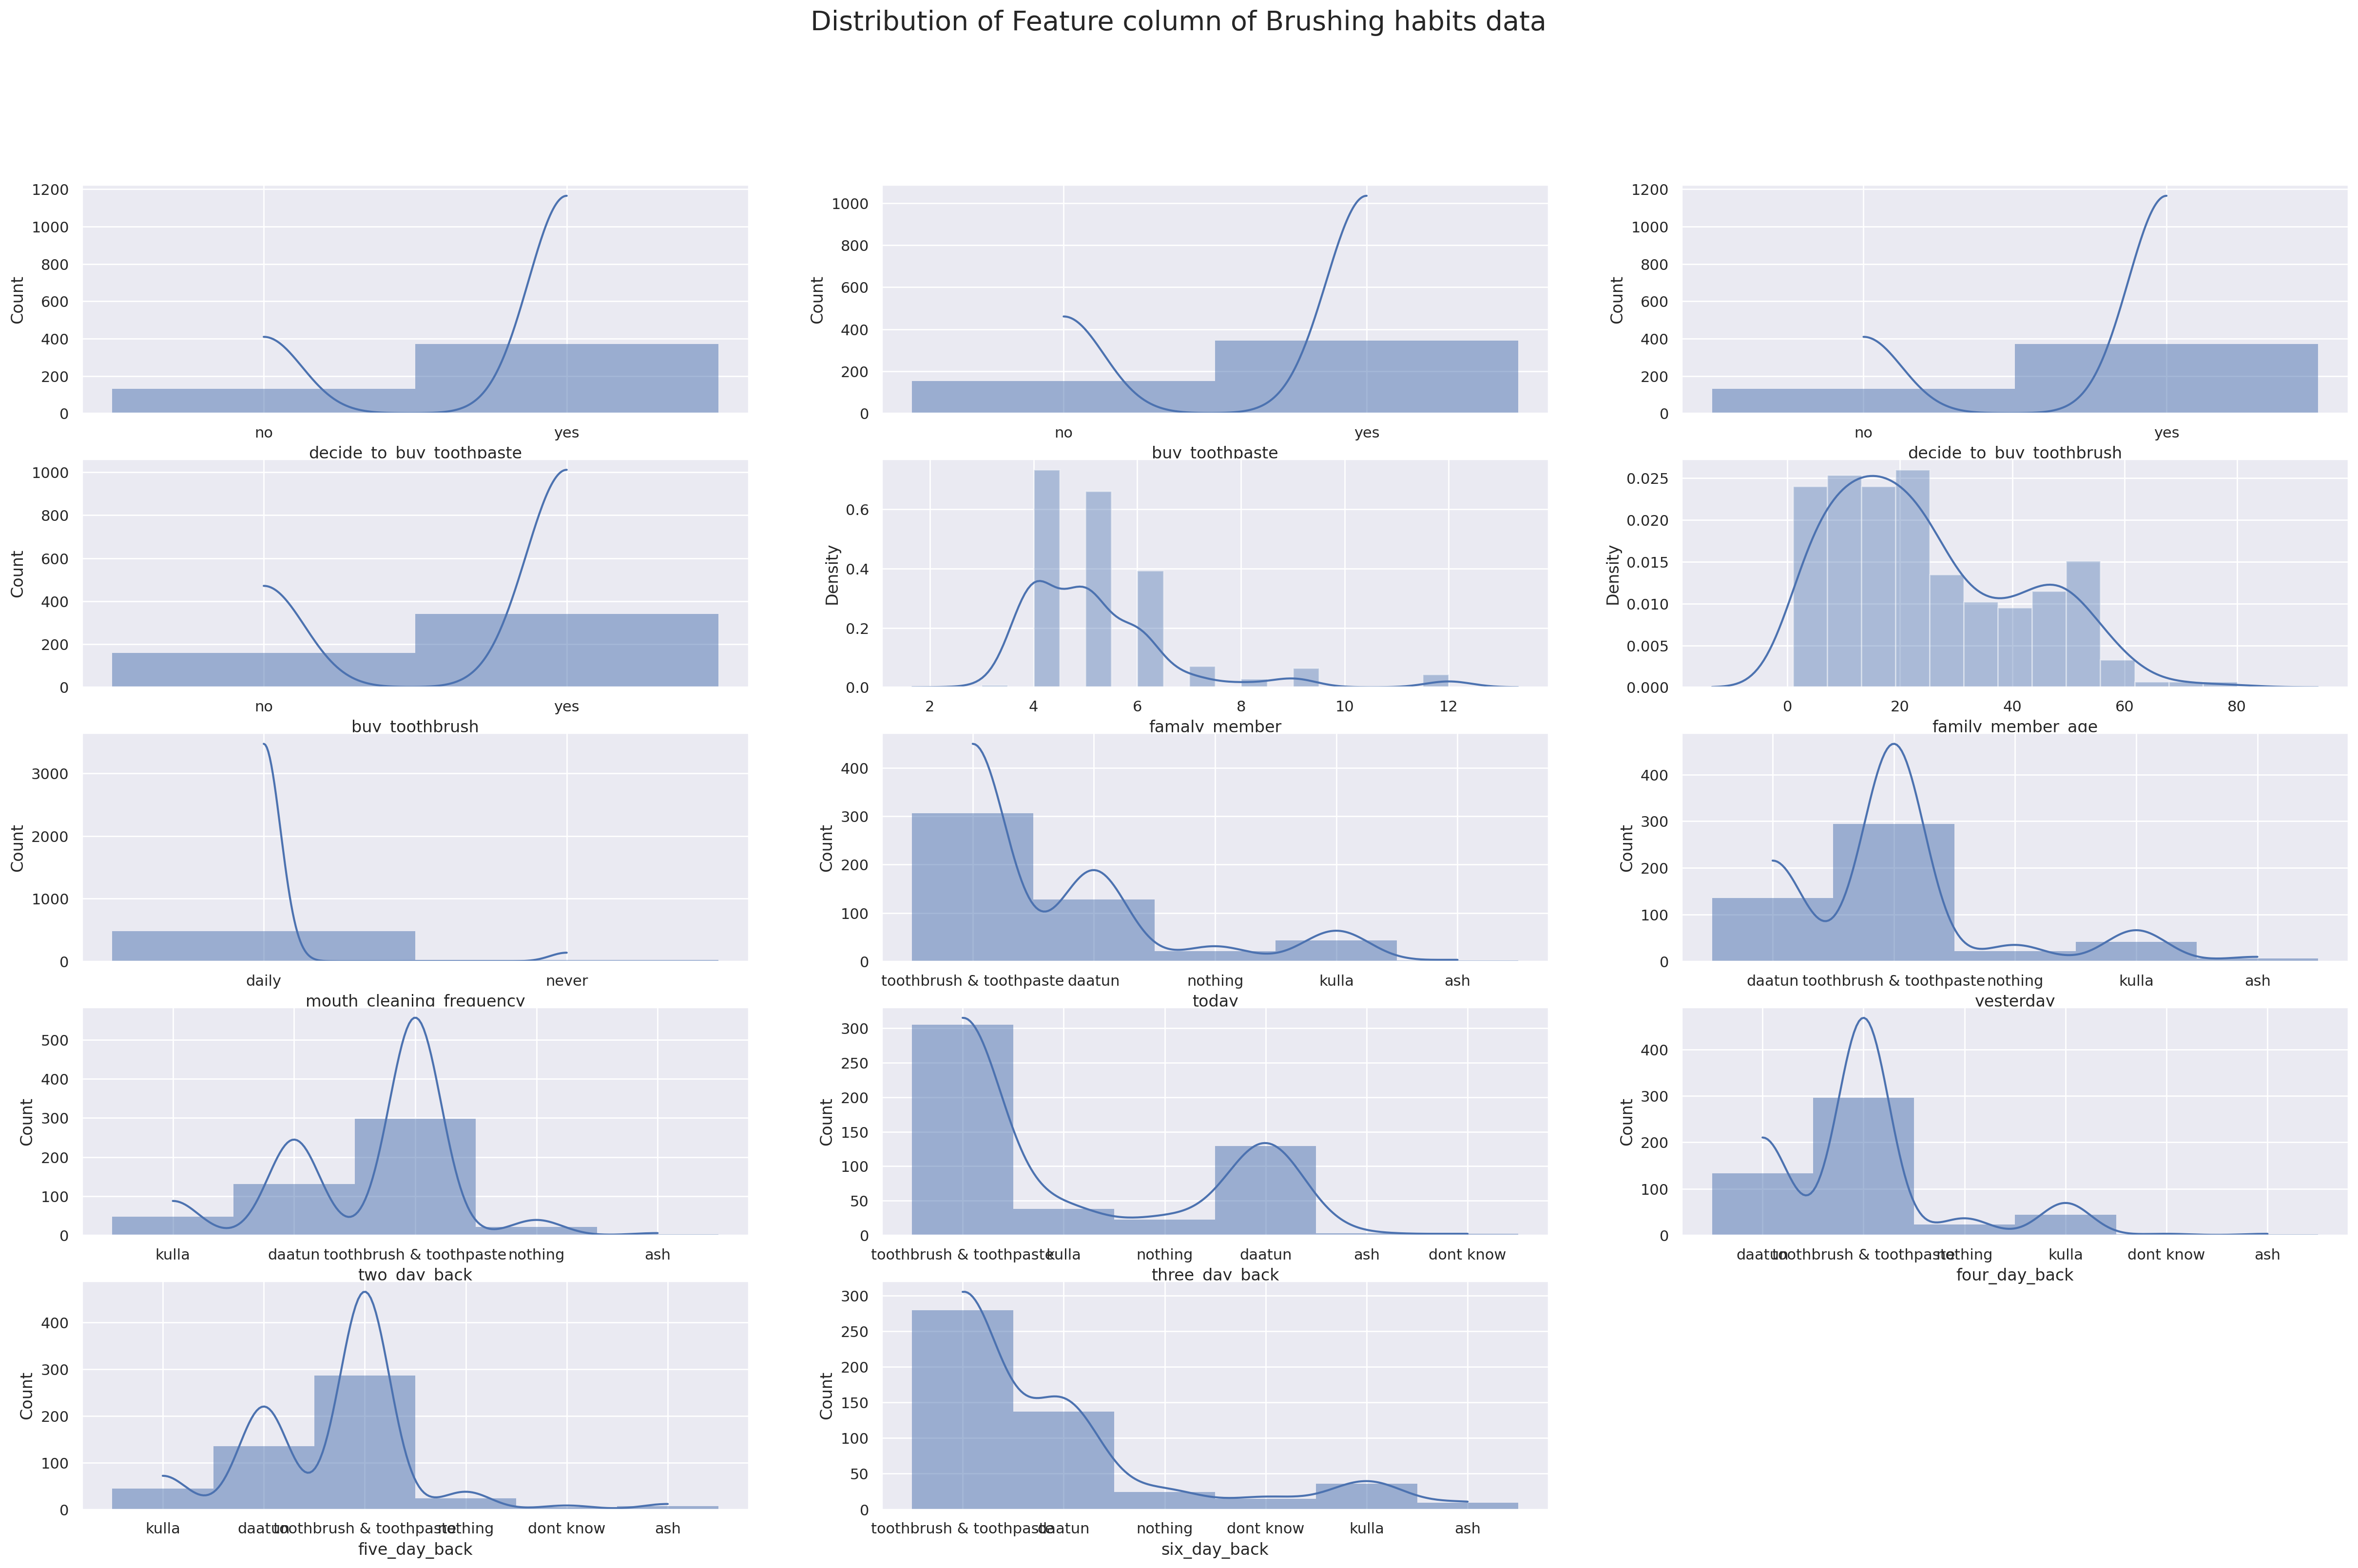

In [ ]:
plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,3,1)
sns.histplot(df.decide_to_buy_toothpaste, edgecolor='', linewidth=0,kde=True)

plt.subplot(5,3,2)
sns.histplot(df.buy_toothpaste, edgecolor='', linewidth=0,kde=True)

plt.subplot(5,3,3)
sns.histplot(df.decide_to_buy_toothbrush, edgecolor='', linewidth=0,kde=True)

plt.subplot(5,3,4)
sns.histplot(df.buy_toothbrush, edgecolor='', linewidth=0,kde=True)

plt.subplot(5,3,5)
sns.distplot(df.famaly_member)

plt.subplot(5,3,6)
sns.distplot(df.family_member_age)

plt.subplot(5,3,7)
sns.histplot(df.mouth_cleaning_frequency, edgecolor='', linewidth=0,kde=True)

plt.subplot(5,3,8)
sns.histplot(df.today, edgecolor='', linewidth=0,kde=True)

plt.subplot(5,3,9)
sns.histplot(df.yesterday, edgecolor='', linewidth=0,kde=True)

plt.subplot(5,3,10)
sns.histplot(df.two_day_back, edgecolor='', linewidth=0,kde=True)

plt.subplot(5,3,11)
sns.histplot(df.three_day_back, edgecolor='', linewidth=0,kde=True)

plt.subplot(5,3,12)
sns.histplot(df.four_day_back, edgecolor='', linewidth=0,kde=True)

plt.subplot(5,3,13)
sns.histplot(df.five_day_back, edgecolor='', linewidth=0,kde=True)

plt.subplot(5,3,14)
sns.histplot(df.six_day_back, edgecolor='', linewidth=0,kde=True)

# plt.subplot(4,4,15)
# sns.histplot(df.decide_to_buy_toothbrush, edgecolor='', linewidth=0,kde=True)

plt.suptitle("Distribution of Feature column of Brushing habits data", fontsize=20)
plt.show()

In [ ]:
df

S No decide_to_buy_toothpaste buy_toothpaste decide_to_buy_toothbrush  \
0       1                       no             no                       no   
1       2                       no             no                       no   
2       3                       no             no                       no   
3       4                      yes            yes                      yes   
4       5                      yes            yes                      yes   
..    ...                      ...            ...                      ...   
495   496                       no             no                       no   
496   497                      yes            yes                      yes   
497   498                       no             no                       no   
498   499                       no             no                       no   
499   500                       no             no                       no   

    buy_toothbrush  other_famaly_member  family_member_age  \
0               no                    3                 50   
1               no                    3                 48   
2               no                    3                 26   
3              yes                    3                 25   
4              yes                    3                  5   
..             ...                  ...                ...   
495             no                    3                 22   
496            yes                    3                 42   
497             no                    3                 20   
498             no                    4                 59   
499             no                    4                 38   

    mouth_cleaning_frequency                    today  \
0                      daily  toothbrush & toothpaste   
1                      daily  toothbrush & toothpaste   
2                      daily  toothbrush & toothpaste   
3                      daily                   daatun   
4                      daily  toothbrush & toothpaste   
..                       ...                      ...   
495                    daily  toothbrush & toothpaste   
496                    daily  toothbrush & toothpaste   
497                    daily                   daatun   
498                    daily                   daatun   
499                    daily  toothbrush & toothpaste   

                   yesterday             two_day_back  \
0                     daatun                    kulla   
1    toothbrush & toothpaste                   daatun   
2    toothbrush & toothpaste  toothbrush & toothpaste   
3    toothbrush & toothpaste                   daatun   
4    toothbrush & toothpaste  toothbrush & toothpaste   
..                       ...                      ...   
495                   daatun  toothbrush & toothpaste   
496                   daatun  toothbrush & toothpaste   
497  toothbrush & toothpaste                      ash   
498  toothbrush & toothpaste                   daatun   
499  toothbrush & toothpaste  toothbrush & toothpaste   

              three_day_back            four_day_back  \
0    toothbrush & toothpaste                   daatun   
1                      kulla  toothbrush & toothpaste   
2    toothbrush & toothpaste  toothbrush & toothpaste   
3    toothbrush & toothpaste                   daatun   
4    toothbrush & toothpaste  toothbrush & toothpaste   
..                       ...                      ...   
495  toothbrush & toothpaste  toothbrush & toothpaste   
496  toothbrush & toothpaste  toothbrush & toothpaste   
497                   daatun                   daatun   
498  toothbrush & toothpaste                   daatun   
499  toothbrush & toothpaste  toothbrush & toothpaste   

               five_day_back             six_day_back  
0                      kulla  toothbrush & toothpaste  
1                     daatun                   daatun  
2    toothbrush & toothpaste  toothbrush & toothpaste  
3                     daatun                

In [ ]:
profile = ProfileReport(df)

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
export=profile.to_html()

In [ ]:
export=profile.to_file("Analysis1.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.to_csv("a.csv", index=False)

In [ ]:
df1 = df.copy()

In [ ]:
for x in clm:
  print(df1[x].unique())
  print("_________________________________________________________________")

['no' 'yes']
_________________________________________________________________
['no' 'yes']
_________________________________________________________________
['no' 'yes']
_________________________________________________________________
['no' 'yes']
_________________________________________________________________
['daily' 'never']
_________________________________________________________________
['toothbrush & toothpaste' 'daatun' 'nothing' 'kulla' 'ash']
_________________________________________________________________
['daatun' 'toothbrush & toothpaste' 'nothing' 'kulla' 'ash']
_________________________________________________________________
['kulla' 'daatun' 'toothbrush & toothpaste' 'nothing' 'ash']
_________________________________________________________________
['toothbrush & toothpaste' 'kulla' 'nothing' 'daatun' 'ash' 'dont know']
_________________________________________________________________
['daatun' 'toothbrush & toothpaste' 'nothing' 'kulla' 'dont know' 'ash']
_______

In [ ]:
for x in list(df.columns[1:]):
  print(df[x].value_counts())
  print("___________________________________________________________________________________________________________")

yes    370
no     130
Name: decide_to_buy_toothpaste, dtype: int64
___________________________________________________________________________________________________________
yes    346
no     154
Name: buy_toothpaste, dtype: int64
___________________________________________________________________________________________________________
yes    370
no     130
Name: decide_to_buy_toothbrush, dtype: int64
___________________________________________________________________________________________________________
yes    341
no     159
Name: buy_toothbrush, dtype: int64
___________________________________________________________________________________________________________
3     183
4     165
5      98
6      18
8      16
11     11
7       7
2       2
Name: other_famaly_member, dtype: int64
___________________________________________________________________________________________________________
50    25
20    24
10    20
3     18
18    18
      ..
49     1
75     1
80     1
65     1
37

In [ ]:
df1.decide_to_buy_toothpaste = df1.decide_to_buy_toothpaste.map({'yes' : 1,
                                  'no' : 2})

df1.buy_toothpaste = df1.buy_toothpaste.map({'yes' : 1,
                                  'no' : 2})

df1.decide_to_buy_toothbrush = df1.decide_to_buy_toothbrush.map({'yes' : 1,
                                  'no' : 2})

df1.buy_toothbrush = df1.buy_toothbrush.map({'yes' : 1,
                                  'no' : 2})

df1.mouth_cleaning_frequency = df1.mouth_cleaning_frequency.map({'daily' : 1,
                                  'never' : 2})

df1.today = df1.today.map({'toothbrush & toothpaste' : 1,
                                  'daatun' : 2,
                                  'nothing' : 3,
                                  'dont know' : 4,
                                  'kulla' : 5,
                                  'ash' : 6})

df1.yesterday = df1.yesterday.map({'toothbrush & toothpaste' : 1,
                                  'daatun' : 2,
                                  'nothing' : 3,
                                  'dont know' : 4,
                                  'kulla' : 5,
                                  'ash' : 6})

df1.two_day_back = df1.two_day_back.map({'toothbrush & toothpaste' : 1,
                                  'daatun' : 2,
                                  'nothing' : 3,
                                  'dont know' : 4,
                                  'kulla' : 5,
                                  'ash' : 6})

df1.three_day_back = df1.three_day_back.map({'toothbrush & toothpaste' : 1,
                                  'daatun' : 2,
                                  'nothing' : 3,
                                  'dont know' : 4,
                                  'kulla' : 5,
                                  'ash' : 6})

df1.four_day_back = df1.four_day_back.map({'toothbrush & toothpaste' : 1,
                                  'daatun' : 2,
                                  'nothing' : 3,
                                  'dont know' : 4,
                                  'kulla' : 5,
                                  'ash' : 6})

df1.five_day_back = df1.five_day_back.map({'toothbrush & toothpaste' : 1,
                                  'daatun' : 2,
                                  'nothing' : 3,
                                  'dont know' : 4,
                                  'kulla' : 5,
                                  'ash' : 6})

df1.six_day_back = df1.six_day_back.map({'toothbrush & toothpaste' : 1,
                                  'daatun' : 2,
                                  'nothing' : 3,
                                  'dont know' : 4,
                                  'kulla' : 5,
                                  'ash' : 6})

In [ ]:
df1

S No  decide_to_buy_toothpaste  buy_toothpaste  decide_to_buy_toothbrush  \
0       1                         2               2                         2   
1       2                         2               2                         2   
2       3                         2               2                         2   
3       4                         1               1                         1   
4       5                         1               1                         1   
..    ...                       ...             ...                       ...   
495   496                         2               2                         2   
496   497                         1               1                         1   
497   498                         2               2                         2   
498   499                         2               2                         2   
499   500                         2               2                         2   

     buy_toothbrush  other_famaly_member  family_member_age  \
0                 2                    3                 50   
1                 2                    3                 48   
2                 2                    3                 26   
3                 1                    3                 25   
4                 1                    3                  5   
..              ...                  ...                ...   
495               2                    3                 22   
496               1                    3                 42   
497               2                    3                 20   
498               2                    4                 59   
499               2                    4                 38   

     mouth_cleaning_frequency  today  yesterday  two_day_back  three_day_back  \
0                           1      1          2             5               1   
1                           1      1          1             2               5   
2                           1      1          1             1               1   
3                           1      2          1             2               1   
4                           1      1          1             1               1   
..                        ...    ...        ...           ...             ...   
495                         1      1          2             1               1   
496                         1      1          2             1               1   
497                         1      2          1             6               2   
498                         1      2          1             2               1   
499                         1      1          1             1               1   

     four_day_back  five_day_back  six_day_back  
0                2              5             1  
1                1              2             2  
2                1              1             1  
3                2              2             2  
4                1              1             1  
..             ...            ...           ...  
495              1              2             1  
496              1              1             2  
497              2              6             6  
498              2              1             2  
499              1              1             1  

[500 rows x 15 columns]

In [ ]:
df1 = df1.drop(labels='S No', axis=1)

In [ ]:
df1

decide_to_buy_toothpaste  buy_toothpaste  decide_to_buy_toothbrush  \
0                           2               2                         2   
1                           2               2                         2   
2                           2               2                         2   
3                           1               1                         1   
4                           1               1                         1   
..                        ...             ...                       ...   
495                         2               2                         2   
496                         1               1                         1   
497                         2               2                         2   
498                         2               2                         2   
499                         2               2                         2   

     buy_toothbrush  other_famaly_member  family_member_age  \
0                 2                    3                 50   
1                 2                    3                 48   
2                 2                    3                 26   
3                 1                    3                 25   
4                 1                    3                  5   
..              ...                  ...                ...   
495               2                    3                 22   
496               1                    3                 42   
497               2                    3                 20   
498               2                    4                 59   
499               2                    4                 38   

     mouth_cleaning_frequency  today  yesterday  two_day_back  three_day_back  \
0                           1      1          2             5               1   
1                           1      1          1             2               5   
2                           1      1          1             1               1   
3                           1      2          1             2               1   
4                           1      1          1             1               1   
..                        ...    ...        ...           ...             ...   
495                         1      1          2             1               1   
496                         1      1          2             1               1   
497                         1      2          1             6               2   
498                         1      2          1             2               1   
499                         1      1          1             1               1   

     four_day_back  five_day_back  six_day_back  
0                2              5             1  
1                1              2             2  
2                1              1             1  
3                2              2             2  
4                1              1             1  
..             ...            ...           ...  
495              1              2             1  
496              1              1             2  
497              2              6             6  
498              2              1             2  
499              1              1             1  

[500 rows x 14 columns]

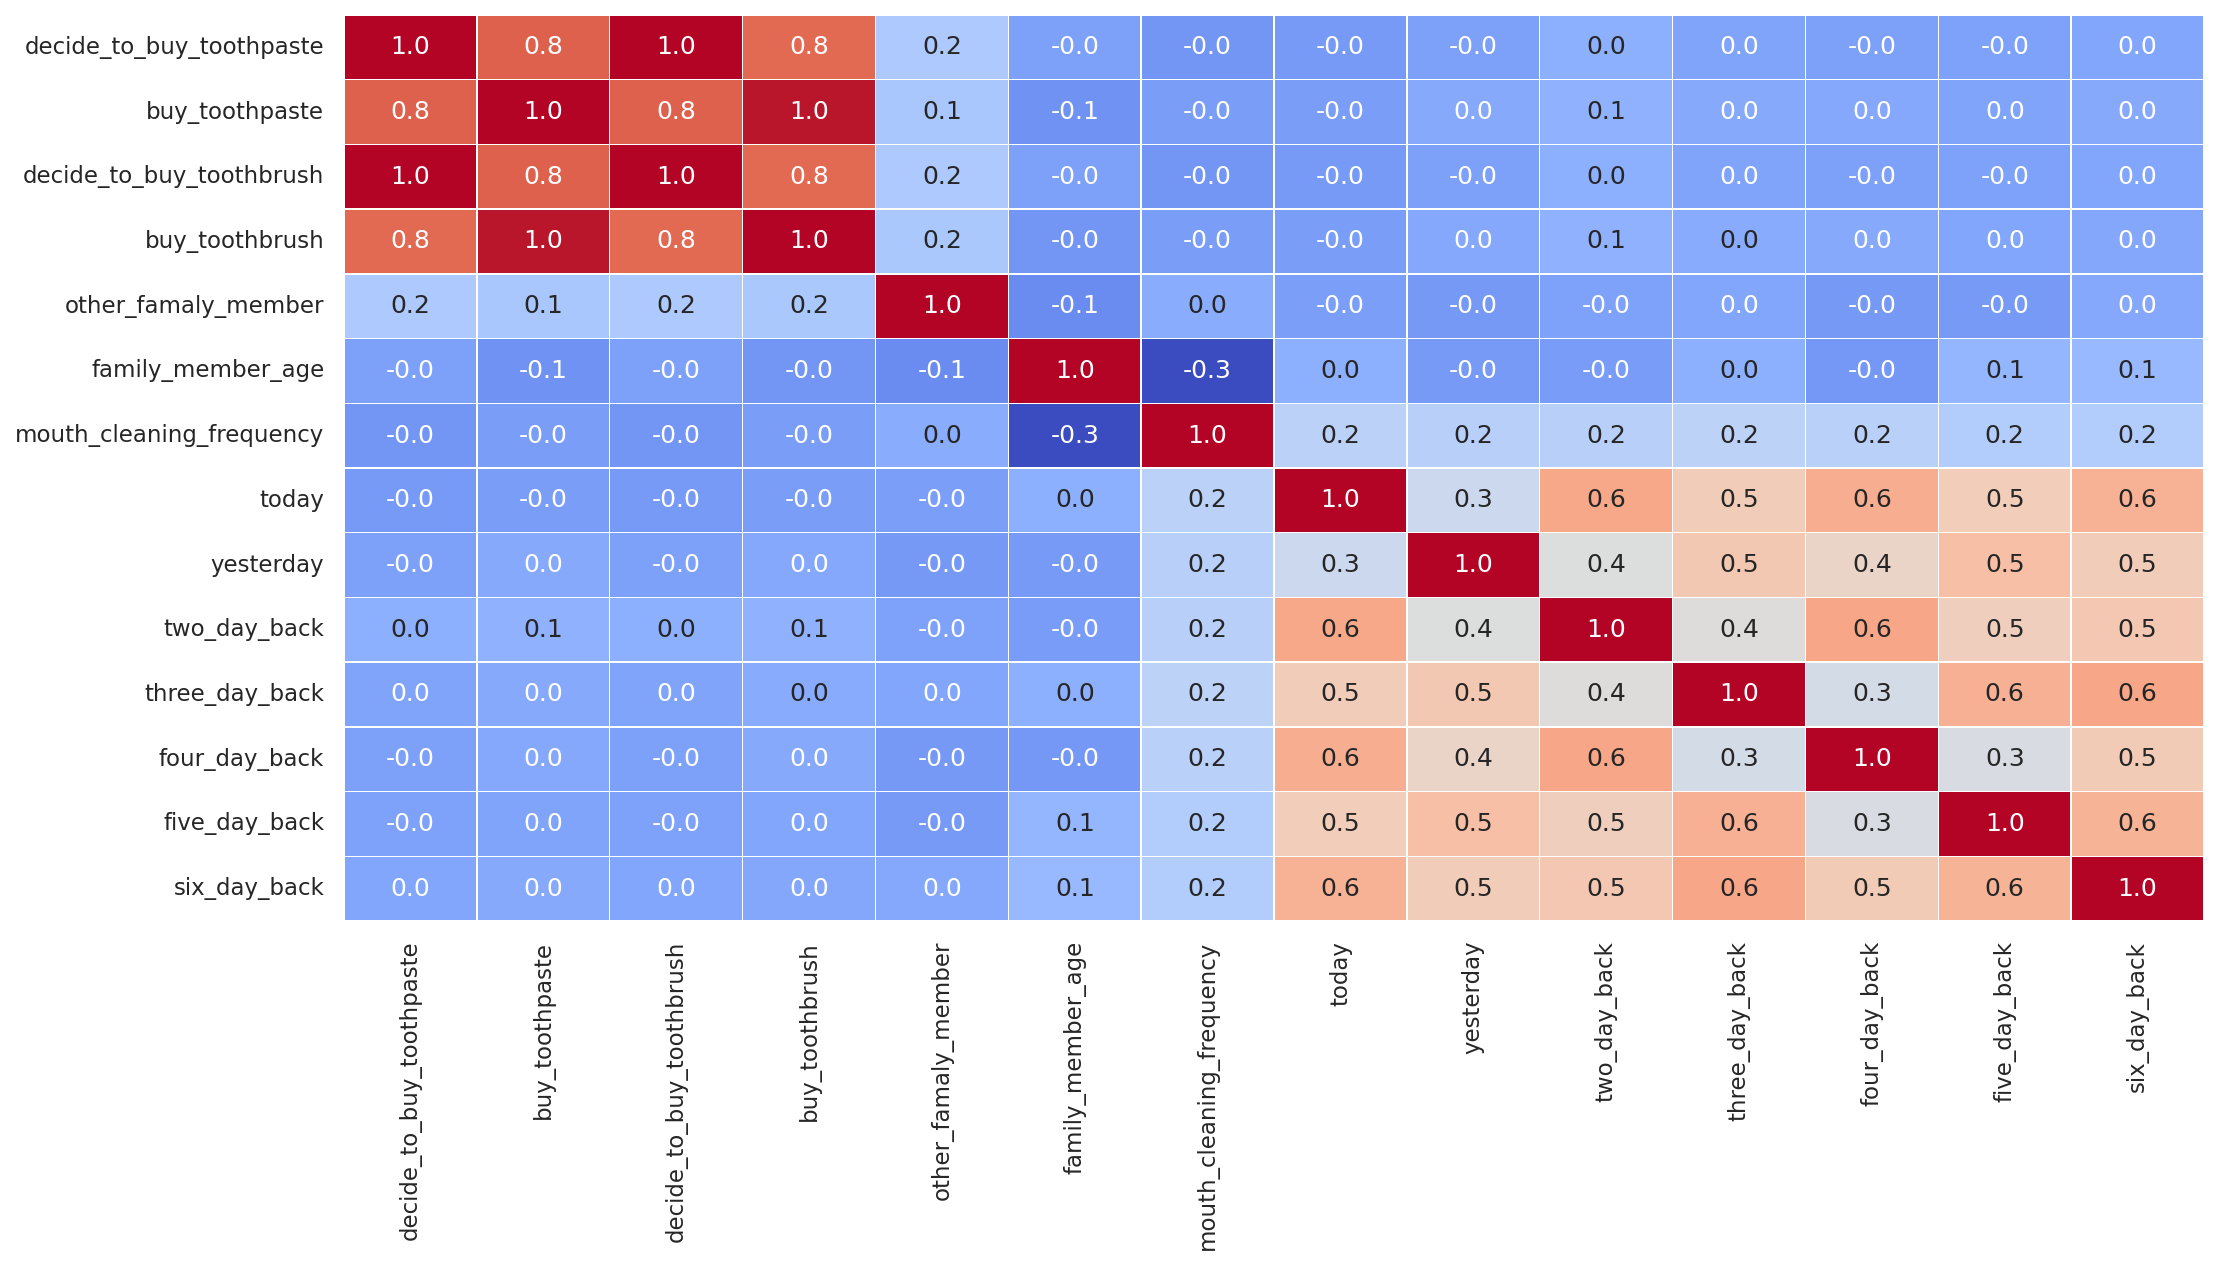

In [ ]:
plt.figure(figsize=(16,8), dpi=150)
sns.heatmap(df1.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

In [ ]:
ProfileReport(a)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile = ProfileReport(df)